In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import os
%matplotlib inline

In [2]:
files = [file for file in os.listdir('Resources/')]
print(files)

['aapl_historical.csv', 'algo_returns.csv', 'cost_historical.csv', 'goog_historical.csv', 'sp500_history.csv', 'whale_returns.csv']


In [3]:
sp500_historical = pd.read_csv('Resources/' + files[4], 
                               index_col='Date', 
                               parse_dates=True, 
                               infer_datetime_format=True).sort_index()

algo_returns = pd.read_csv('Resources/' + files[1], 
                           index_col='Date', 
                           parse_dates=True, 
                           infer_datetime_format=True).sort_index()
whale_returns = pd.read_csv('Resources/' + files[5], 
                            index_col='Date', 
                            parse_dates=True, 
                            infer_datetime_format=True).sort_index()

# My portfolio


In [4]:
print(whale_returns.head()) # Read in whale returns
print(whale_returns.isna().sum()) # Count the nulls
whale_returns.dropna(inplace = True) # Drop the nulls
print(whale_returns.isna().sum())

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE H

In [5]:
print(algo_returns) # Read in algo 
print(algo_returns.isna().sum()) # Count the nulls
algo_returns.dropna(inplace = True) # Drop the nulls
print(algo_returns.isna().sum())

              Algo 1    Algo 2
Date                          
2014-05-28  0.001745       NaN
2014-05-29  0.003978       NaN
2014-05-30  0.004464       NaN
2014-06-02  0.005692       NaN
2014-06-03  0.005292       NaN
...              ...       ...
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

[1241 rows x 2 columns]
Algo 1    0
Algo 2    6
dtype: int64
Algo 1    0
Algo 2    0
dtype: int64


In [6]:
print(sp500_historical) # Read in sp500
print(sp500_historical.info()) # Check the data types
sp500_historical= sp500_historical.apply(lambda x: x.str.replace('$','').apply(lambda x: float(x))).dropna() #Fix the data types

print(sp500_historical.head())
sp500_historical = pd.DataFrame(sp500_historical.pct_change()) # Calculate daily returns
sp500_historical.columns = ['SP500'] # Rename the close column

print(sp500_historical.isna().sum()) # Count the nulls
sp500_historical.dropna(inplace = True) # Drop the nulls
print(sp500_historical.isna().sum())

print(sp500_historical.head())

               Close
Date                
2012-10-01  $1444.49
2012-10-02  $1445.75
2012-10-03  $1450.99
2012-10-04  $1461.40
2012-10-05  $1460.93
...              ...
2019-04-16  $2907.06
2019-04-17  $2900.45
2019-04-18  $2905.03
2019-04-22  $2907.97
2019-04-23  $2933.68

[1649 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2012-10-01 to 2019-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB
None
              Close
Date               
2012-10-01  1444.49
2012-10-02  1445.75
2012-10-03  1450.99
2012-10-04  1461.40
2012-10-05  1460.93
SP500    1
dtype: int64
SP500    0
dtype: int64
               SP500
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457


In [7]:
combined_return_df = pd.concat([sp500_historical,whale_returns,algo_returns,], 
                               axis = 'columns',
                               join = 'inner') # Combined the dataframes
combined_return_df.dropna(inplace = True) # Drop the nulls
combined_return_df.tail()


,SP500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2019-04-16,0.000509,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899
2019-04-17,-0.002274,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228
2019-04-18,0.001579,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229
2019-04-22,0.001012,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936
2019-04-23,0.008841,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622


### Defining a function that will automate some of the repetitiveness of plotting a graph

In [8]:
def graph(title,xlabel,ylabel):
    title = plt.title(title)
    xlabel = plt.xlabel(xlabel)
    ylabel = plt.ylabel(ylabel)
    return title, xlabel,ylabel

# Daily Returns
---
* This isn't all too helpful by itself as they are all pretty much the same. However, there will be more information that will make this information more useful.

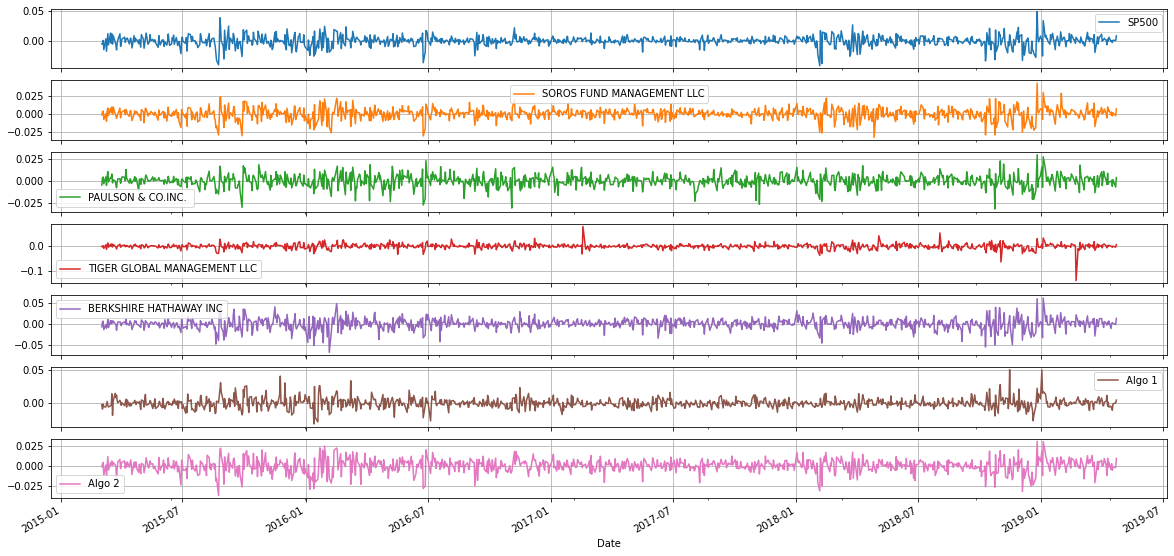

In [9]:
combined_return_df.plot(figsize = (20,10),
                        subplots = True,
                        grid = True) # Plot the daily returns
plt.legend(loc ='lower left')

# Cumulative Returns
---

## Analysis
---
* #### When calculating the cumulative returns of the portfolios it is clear which one outperformed the others: Algo 1
* #### The underperformer is also easily spotted: Paulson

(Text(0.5, 1.0, 'Cumulative Returns of All Portfolios'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Cumulative Returns as a multiplier'))

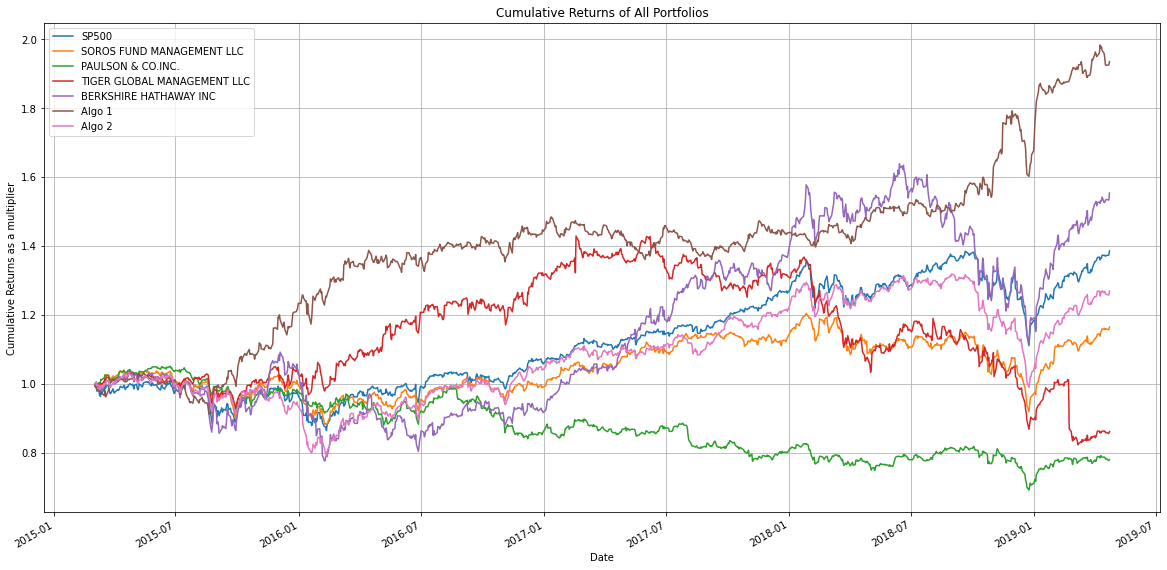

In [10]:
combined_cumulative_returns = ((1 + combined_return_df).cumprod()) # Calculate cumulative returns of all portfolios
combined_cumulative_returns.plot(figsize = (20,10),grid =True) # Plot those cumulative returns
graph('Cumulative Returns of All Portfolios','Date','Cumulative Returns as a multiplier')

# Boxplot/Risk
---

## Analysis
---
### Using the boxplot, a first glimpse of the risk/volatility in the portfolio can be visualized.
* The riskiest portfolio with the widest swings is Tiger
* The most consistent was Paulson.

### With the two graphs shown show us some interesting developments:
* The riskiest portfolio did not outperform all other portfolios: Tiger
* The least risky portfolio happened to make consistently bad returns: Paulson

(Text(0.5, 1.0, 'Returns as Percents % of All Portfolios'),
 Text(0.5, 69.0, ' Returns as Percents'),
 Text(138.375, 0.5, 'Portfolios'))

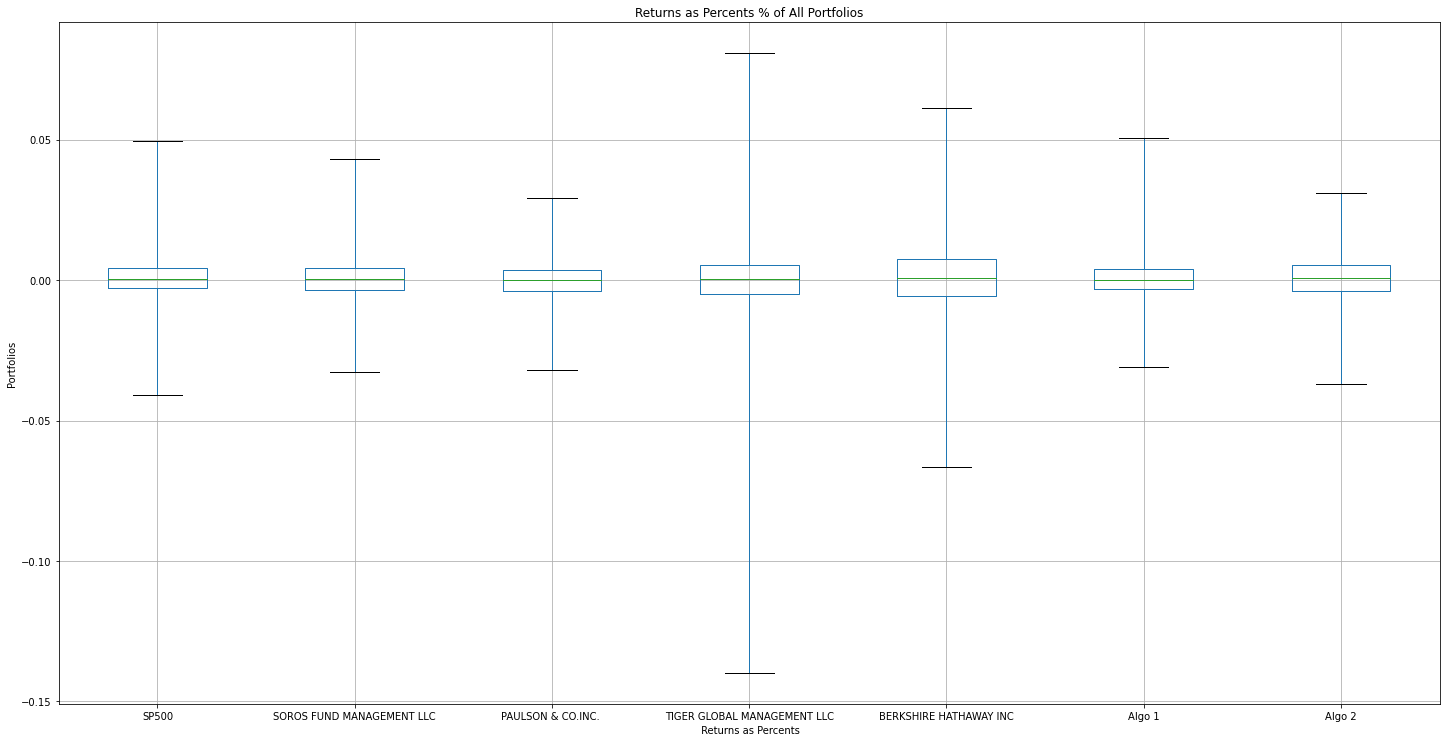

In [11]:
combined_return_df.boxplot(figsize=(20,10), grid = True, whis = [0,100]) # Create a boxplot to visually show risk
plt.tight_layout()
graph('Returns as Percents % of All Portfolios',' Returns as Percents', 'Portfolios')

# Standard Deviation/Risk
---
Standard deviation essentially shows us how volatile/wild the stock prices were over a period of time. The daily standard deviation was calculated below, but normally those would be converted into annualize percentages.

## Analysis
---
### Verifying our graphs with numbers.
* The portfolio with the highest standard deviation happened to be the one with the widest whisker spread: Tiger
* The most consistent portfolio happend to be the one with the most narrow whisker spread: Paulson
### These numbers check out and our initial assumtion from the two first graphs is correct.
### The next graph visually represents the annualized standard deviation for easier comparison.

In [12]:
combined_daily_std = combined_return_df.std() # Calculate the daily standard deviations
combined_daily_std.head()

SP500                          0.008554
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [13]:
sp500_daily_std = combined_daily_std.iloc[0]
sp500_daily_std

0.008553731597758204

# Benchmarking Risk with the SP500
---
The SP500 is generally used as the benchmark to compare the returns of any investor. 

## Analysis
---
### Which Portfolios had more consistend/less risky returns than the SP500?
* The code below tells us that the portfolios with more consistent and less risky returns than the SP500 were Soros, Paulson, Algo 1, and Algo 2
* The portfolios with more volatile and risky returns are Tiger and Berkshire.

In [14]:
riskier_portfolios = [] # Determine which portfolios are riskier than the sp500
less_risky_portfolio = []
for i in combined_daily_std.index:
    Portfolio = i
    std = combined_daily_std[i]
    SP500 = combined_daily_std[0]
    if std > SP500:
        riskier_portfolios.append([Portfolio])
    elif std == SP500:
        pass
    elif std < SP500:
        less_risky_portfolio.append(Portfolio)

In [15]:
print(f'The following Portfolios have returns that are less risky and more consistent than the SP500: \n\n '
      f'{less_risky_portfolio}')

The following Portfolios have returns that are less risky and more consistent than the SP500: 

 ['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ', 'Algo 1', 'Algo 2']


In [16]:
print(f'The following Portfolios have returns that are riskier and more volatile than the SP500: \n\n'
     f'{riskier_portfolios}')

The following Portfolios have returns that are riskier and more volatile than the SP500: 

[['TIGER GLOBAL MANAGEMENT LLC'], ['BERKSHIRE HATHAWAY INC']]


# Annualized Standard Deviation
---
Annualized Standard Deviation is normally used, because it allows for an investor to more accurately interpret the numbers as investments are usually compared with each other on an annual basis.

Compare this graph below with the boxplot above. You will find they mirror each other in the results they display.

SP500                          0.135786
SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
dtype: float64


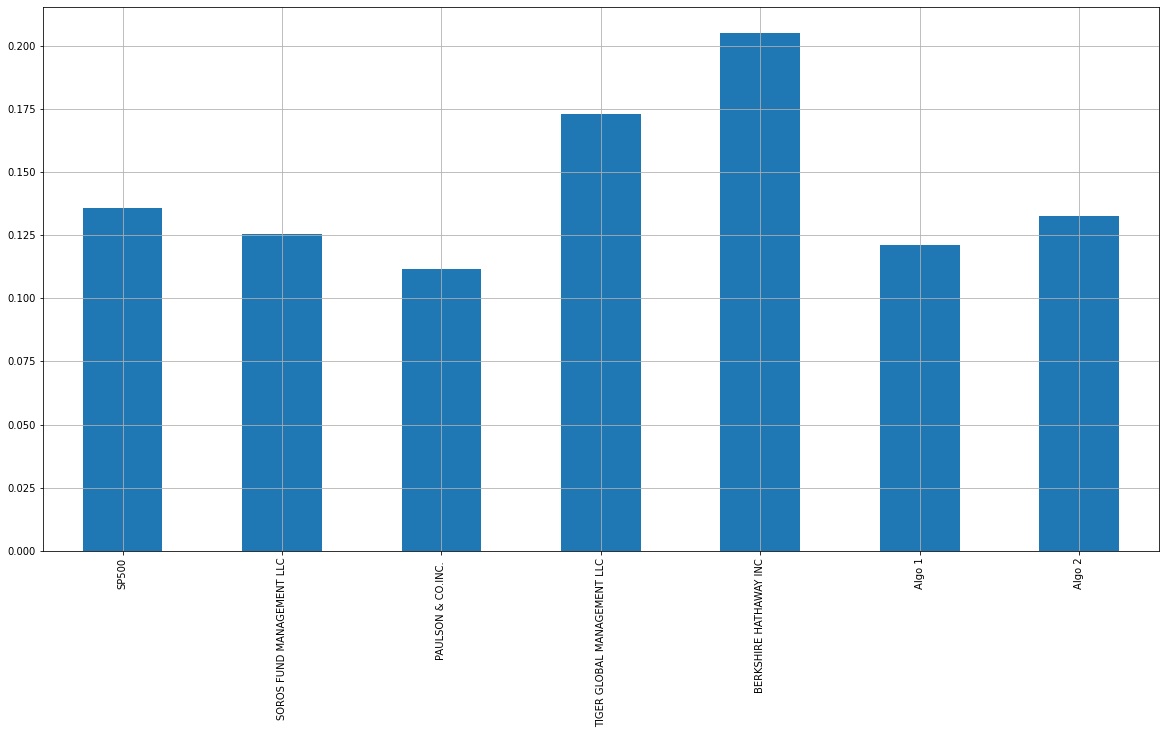

In [17]:
combined_annualized_std = combined_daily_std * np.sqrt(252) #Calculate annualized standard deviation
combined_annualized_std.plot(kind = 'bar',figsize = (20,10), grid = True)
print(combined_annualized_std)

# 21-Day Rolling Standard Deviation
---

This is used to filter out the day to day noise and give us more general risk trends.

## Analysis
---
This graph is interesting, because it shows us what no other graph thus far has. It shows us the fact that for a large portion of the time, Bershire tends to have a higher standard deviation/risk on returns. However, because of the intensity of Tiger's spikes, Tiger is shown to have the highest standard deviation/risk on return overall.

(Text(0.5, 1.0, '21-Day Rolling Standard Deviation of Returns in Percents of  All Portfolios'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Standard Deviation of Returns'))

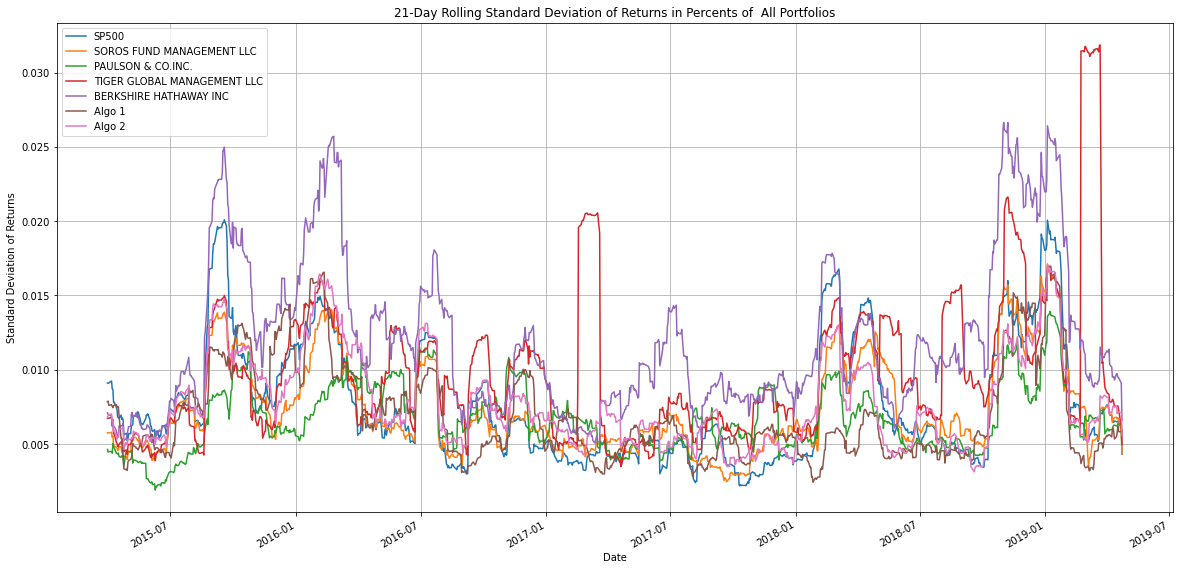

In [18]:
rolling_std_21 = combined_return_df.rolling(window = 21).std() # Calculate the 21-day rolling standard deviation
rolling_std_21.plot(figsize = (20,10),grid = True) # Plot the 21-day rolling standard deviation
graph('21-Day Rolling Standard Deviation of Returns in Percents of  All Portfolios','Date','Standard Deviation of Returns')

# Correlation
---

The heatmap below shows the correlation between each portfolios' returns and the sp500's.The correlation shows us if there is a relationship between each portfolio's returns and the market's, but not the degree that relationship impacts the portfolios returns.

## Analysis
---
* We can see that the portfolio with the highest correlation with the sp500 is the Soros Fund. This in turn tells us that if the investor were to desire a portfolio that would allow for the maximum diversification, Soros's Fund would not be the one to choose.
* The company whose returns have the lowest correlation with the sp500's is Algo 1. The inverse of above would be true for Algo 1. An investor wanting diversification should choose to invest in this portfolio.
* Later, we will take a look at the beta, which shows us to what degree each portfolio's returns change in relation to the market's.

<AxesSubplot:>

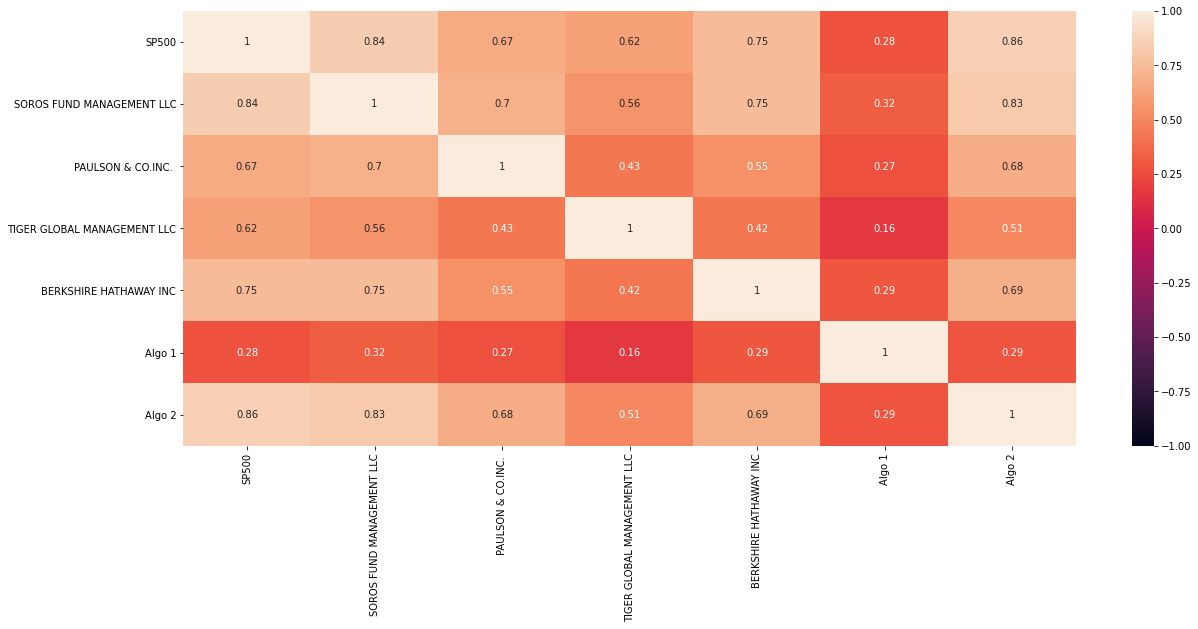

In [19]:
correlation = combined_return_df.corr() # Calculate the correlation 
a4_dims = (20, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(correlation,vmax = -1, vmin = 1, annot = True) # Plot the correlation

In [20]:
sp500 = combined_return_df.iloc[:,0]
soros_fund = combined_return_df.iloc[:,1]
paulson_fund = combined_return_df.iloc[:,2]
tiger_fund = combined_return_df.iloc[:,3]
berkshire_fund = combined_return_df.iloc[:,4]
algo1_fund = combined_return_df.iloc[:,5]
algo2_fund = combined_return_df.iloc[:,6]

# Beta
---
## Beta, unlike correlation, tells us to what extent we can expect a stock/portfolio to move in relation to every percent the market moves. 
* This is a good thing to know. If the investor is in a bull market and expects the market to continue to go up, a high beta (e.g. 2) would imply that for every percent up the market goes, the investor's portfolio is expected to increase by twice that.
* However, if the investor expected a bear market, they would be wise to reduce their portfolio's beta (or invest in a portfolio with a lower beta) as the same portfolio described above is expected to decrease at twice the rate of the market.

In [21]:
def beta(fund, index): # Calculate the covariance of each portfolio
    variance = index.var()
    covariance = fund.cov(index)
    beta = covariance / variance
    return beta

In [22]:
soros_beta = beta(soros_fund,sp500)
print(soros_beta)

0.7733753547794657


In [23]:
paulson_beta = beta(paulson_fund,sp500)
print(paulson_beta)

0.5498861853574533


In [24]:
tiger_beta = beta(tiger_fund,sp500)
print(tiger_beta)

0.7946528805681052


In [25]:
berkshire_beta = beta(berkshire_fund,sp500)
print(berkshire_beta)

1.1347891297491728


In [26]:
algo1_beta = beta(algo1_fund,sp500)
print(algo1_beta)

0.24899091459425748


In [27]:
algo2_beta = beta(algo2_fund,sp500)
print(algo2_beta)

0.8375345402757787


## Analysis
---
* As can be seen from the graph below, the company with the highest Beta is actually Berkshire. The portfolio with the lowest Beta is Algo 1.
* Since Berkshire has the highest Beta, it could be assumed that it's returns were directly related to the returns of the market. If the market was doing well, then Berkshire was doing well.
* Since Algo 1's portfolio had the lowest beta, the opposite could be said. This portfolios returns were less direclty related to the market.

                                Betas
SOROS FUND MANAGEMENT LLC    0.773375
PAULSON & CO.INC.            0.549886
TIGER GLOBAL MANAGEMENT LLC  0.794653
BERKSHIRE HATHAWAY INC       1.134789
Algo 1                       0.248991
Algo 2                       0.837535


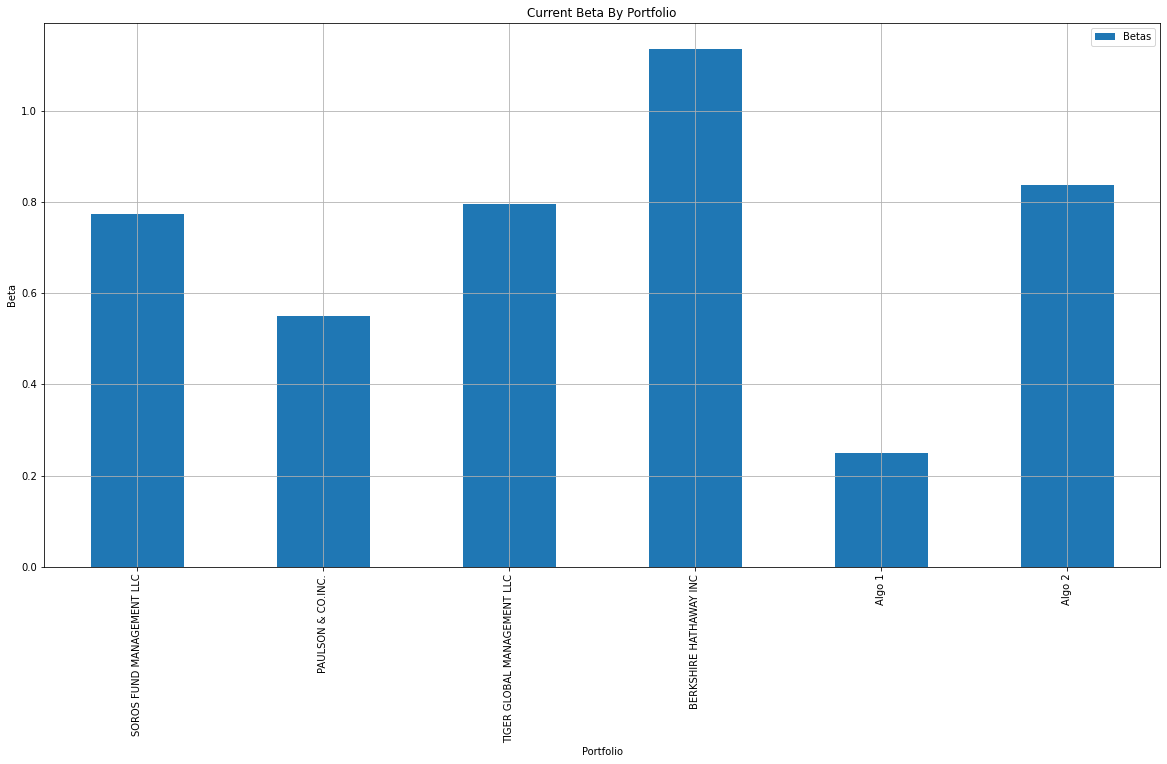

In [28]:
all_single_point_betas = pd.DataFrame([soros_beta,paulson_beta,
                                       tiger_beta,berkshire_beta,
                                       algo1_beta,algo2_beta], 
                                      
                                      index = ['SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC.',
                                               'TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC',
                                               'Algo 1', 'Algo 2'],
                                     columns = ['Betas']) # Plot the beta

all_single_point_betas.plot(kind = 'bar',
                            grid = True,
                            figsize = (20,10))

graph('Current Beta By Portfolio','Portfolio','Beta')
print(all_single_point_betas)

# 21-Day Rolling Beta
---
* Just like with a rolling standard deviation, the rolling beta is used to reduce the day to day noice produced by the actual day to day betas. 
* By smoothing out the betas with a rolling average, we can get rid of the day to day noise and see a general trend.

In [29]:
# algo1_beta = algo_returns['Algo 1'].rolling(window = 21).cov(sp500_returns['SP500 Returns']) / sp500_returns.rolling(window = 21).var()
# algo1_beta.plot(kind = 'scatter', x = sp500_returns.rolling(window = 21).var(), y = algo_returns['Algo 1'].rolling(window = 21).cov(sp500_returns['SP500 Returns']))

In [30]:
def rollingBeta(portfolio_returns,sp500_returns,window): # Finding the beta trends
    portfolio_covariance = portfolio_returns.rolling(window = window).cov(sp500_returns)
    sp500_rolling_variance = sp500_returns.rolling(window = window).var()
    beta = portfolio_covariance / sp500_rolling_variance
    return beta.dropna()

In [31]:
algo1_rolling_beta = rollingBeta(algo1_fund,sp500,60)
algo1_rolling_beta

Date
2015-05-27    0.164082
2015-05-28    0.160533
2015-05-29    0.150781
2015-06-01    0.146808
2015-06-02    0.127359
                ...   
2019-04-16    0.025920
2019-04-17    0.072232
2019-04-18    0.069934
2019-04-22    0.069525
2019-04-23    0.084337
Length: 984, dtype: float64

In [32]:
algo2_rolling_beta = rollingBeta(algo2_fund,sp500,60)
algo2_rolling_beta

Date
2015-05-27    0.706504
2015-05-28    0.708746
2015-05-29    0.718590
2015-06-01    0.716991
2015-06-02    0.709360
                ...   
2019-04-16    0.910622
2019-04-17    0.923897
2019-04-18    0.925305
2019-04-22    0.926647
2019-04-23    0.922600
Length: 984, dtype: float64

In [33]:
soros_rolling_beta = rollingBeta(soros_fund,sp500,60)
soros_rolling_beta

Date
2015-05-27    0.587678
2015-05-28    0.589662
2015-05-29    0.592375
2015-06-01    0.591645
2015-06-02    0.590608
                ...   
2019-04-16    0.840772
2019-04-17    0.822868
2019-04-18    0.823598
2019-04-22    0.825137
2019-04-23    0.806330
Length: 984, dtype: float64

In [34]:
paulson_rolling_beta = rollingBeta(paulson_fund,sp500,60)
paulson_rolling_beta

Date
2015-05-27    0.365486
2015-05-28    0.359158
2015-05-29    0.361828
2015-06-01    0.359795
2015-06-02    0.363764
                ...   
2019-04-16    0.612348
2019-04-17    0.600559
2019-04-18    0.600784
2019-04-22    0.603598
2019-04-23    0.580211
Length: 984, dtype: float64

In [35]:
tiger_rolling_beta = rollingBeta(tiger_fund,sp500,60)
tiger_rolling_beta

Date
2015-05-27    0.686327
2015-05-28    0.690174
2015-05-29    0.692355
2015-06-01    0.691368
2015-06-02    0.697001
                ...   
2019-04-16    0.386909
2019-04-17    0.383682
2019-04-18    0.383226
2019-04-22    0.383434
2019-04-23    0.380797
Length: 984, dtype: float64

In [36]:
berkshire_rolling_beta = rollingBeta(berkshire_fund,sp500,60)
berkshire_rolling_beta

Date
2015-05-27    0.652798
2015-05-28    0.650503
2015-05-29    0.663826
2015-06-01    0.662655
2015-06-02    0.642690
                ...   
2019-04-16    1.337986
2019-04-17    1.301791
2019-04-18    1.302226
2019-04-22    1.304125
2019-04-23    1.278284
Length: 984, dtype: float64

In [37]:
all_rolling_betas = pd.concat([soros_rolling_beta,
                               paulson_rolling_beta,
                               tiger_rolling_beta,
                               berkshire_rolling_beta, 
                               algo1_rolling_beta, 
                               algo2_rolling_beta],
                              axis = 'columns',
                              join = 'inner')
all_rolling_betas.columns = ['Soros','Paulson','Tiger','Berkshire','Algo 1',' Algo 2']
all_rolling_betas # Calculate the beta trends

,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2
Date,,,,,,
2015-05-27,0.587678,0.365486,0.686327,0.652798,0.164082,0.706504
2015-05-28,0.589662,0.359158,0.690174,0.650503,0.160533,0.708746
2015-05-29,0.592375,0.361828,0.692355,0.663826,0.150781,0.718590
2015-06-01,0.591645,0.359795,0.691368,0.662655,0.146808,0.716991
2015-06-02,0.590608,0.363764,0.697001,0.642690,0.127359,0.709360
...,...,...,...,...,...,...
2019-04-16,0.840772,0.612348,0.386909,1.337986,0.025920,0.910622
2019-04-17,0.822868,0.600559,0.383682,1.301791,0.072232,0.923897
2019-04-18,0.823598,0.600784,0.383226,1.302226,0.069934,0.925305


(Text(0.5, 1.0, 'Rolling Beta By Portfolio'),
 Text(0.5, 0, 'Portfolios'),
 Text(0, 0.5, 'Betas'))

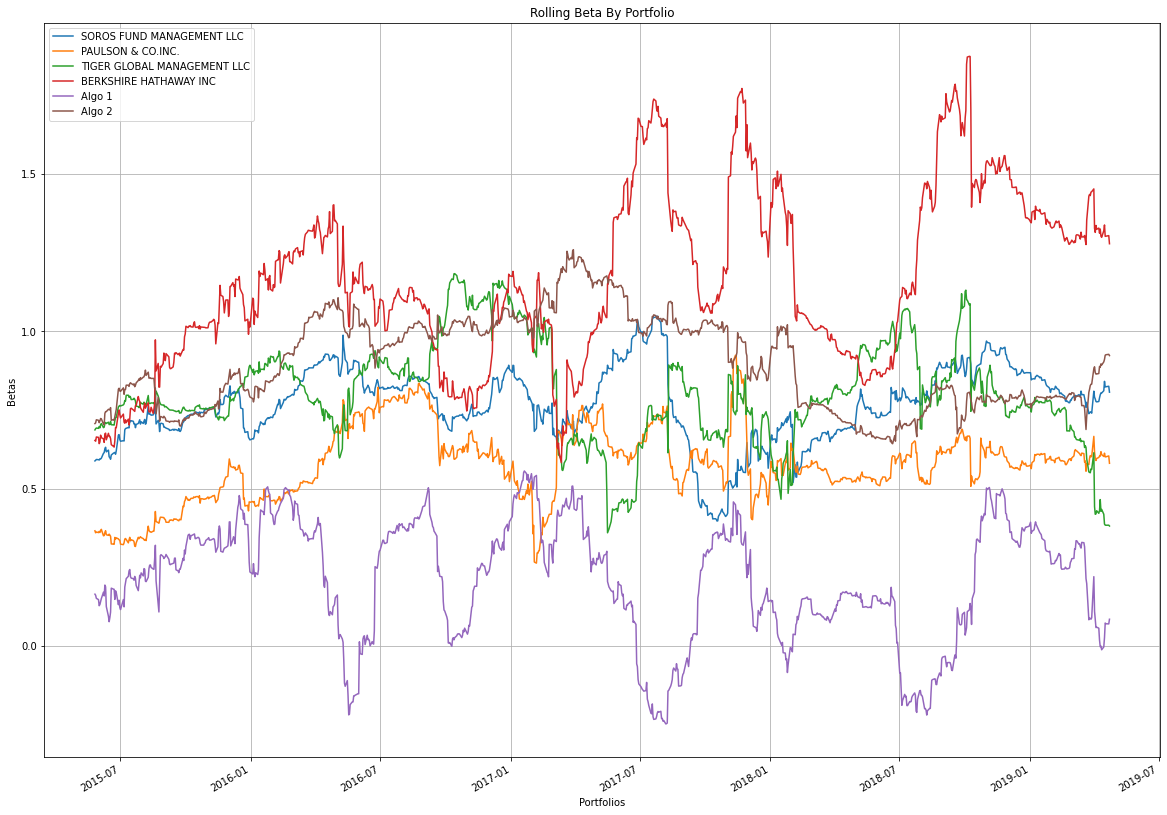

In [38]:
all_rolling_betas.columns = ['SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC.','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1', 'Algo 2']
all_rolling_betas.plot(figsize = (20,15), grid = True, subplots =False)
graph('Rolling Beta By Portfolio','Portfolios','Betas') # Plot the beta trends

## Analysis
---
* According to this graph, the portfolio most impacted by market swings is Algo2.
* The company least impacted by the market was Soros.
* It is interesting to note that, just like with Berkshire and the rolling standard deviation, for most of the
* Using this form of risk measurement, we can see that the portfolio with the highest/lowest beta was Algo2/Soros and not Tiger/Paulson.
* This means that while Tiger has wider return spreads than Algo 2, they are not as much of a result of market swings.
* On the other hand, if you were to choose a portfolio from the bunch that was least impacted by market moves, you would choose Soros.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

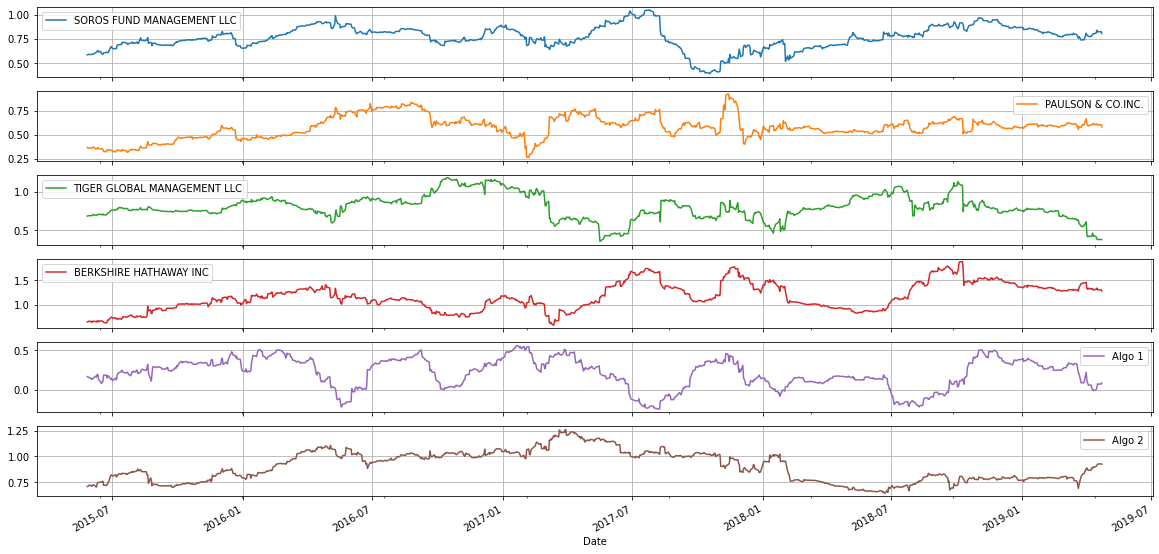

In [39]:
all_rolling_betas.plot(figsize = (20,10),grid = True, subplots = True) # Plot the beta trends version 2

,SP500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.004539,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,-0.004462,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761
2015-03-05,-0.002514,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988
2015-03-06,-0.005575,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542
2015-03-09,-0.003436,-0.000496,0.000724,-0.000524,-0.002121,-0.004415,-0.000903
...,...,...,...,...,...,...,...
2019-04-16,0.001489,0.001649,0.000489,-0.000374,0.001825,0.000688,0.001437
2019-04-17,0.001317,0.001441,0.000171,-0.000558,0.001889,0.000186,0.001132
2019-04-18,0.001329,0.001441,0.000218,-0.000507,0.001890,0.000151,0.001025


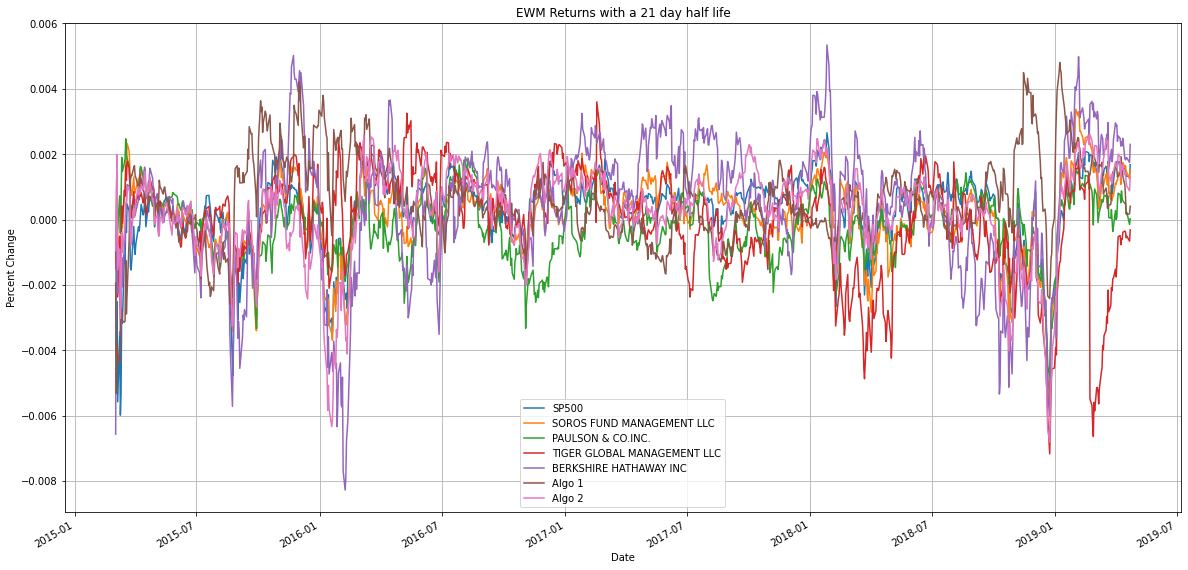

In [40]:
ewm_returns = combined_return_df.ewm(halflife = '21 days', times = combined_return_df.index).mean() # Calculate the EWM w/a 21 day halflife
ewm_returns.plot(kind = 'line',figsize = (20,10), grid = True)
graph('EWM Returns with a 21 day half life','Date','Percent Change')
ewm_returns
# This is the original way I did it, but the one below is easier to read/type. I just thought I'd keep in in here. I was pretty proud of it lol.

,SP500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.004539,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,-0.004462,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761
2015-03-05,-0.002514,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988
2015-03-06,-0.005575,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542
2015-03-09,-0.003543,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935
...,...,...,...,...,...,...,...
2019-04-16,0.001352,0.001480,0.000448,-0.000813,0.001862,0.000912,0.001364
2019-04-17,0.001234,0.001338,0.000223,-0.000930,0.001906,0.000548,0.001150
2019-04-18,0.001246,0.001341,0.000256,-0.000881,0.001907,0.000511,0.001073


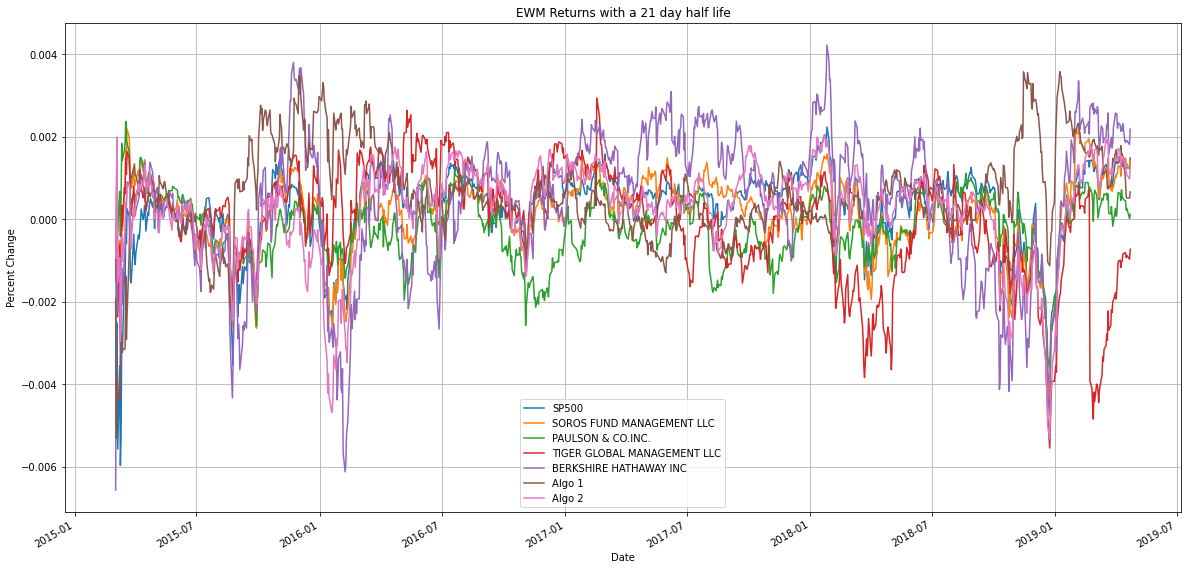

In [41]:
ewm_returns= combined_return_df.ewm(halflife = 21).mean() # Calculate the EWM w/a 21 day halflife
ewm_returns.plot(kind = 'line',figsize = (20,10), grid = True)
graph('EWM Returns with a 21 day half life','Date','Percent Change')
ewm_returns

,SP500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.000106,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380
2015-03-05,0.003294,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662
2015-03-06,0.006498,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166
2015-03-09,0.007083,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290
...,...,...,...,...,...,...,...
2019-04-16,0.007837,0.007632,0.006846,0.016301,0.011939,0.006922,0.007938
2019-04-17,0.007736,0.007547,0.006846,0.016047,0.011746,0.007097,0.007896
2019-04-18,0.007610,0.007424,0.006737,0.015787,0.011554,0.006984,0.007779


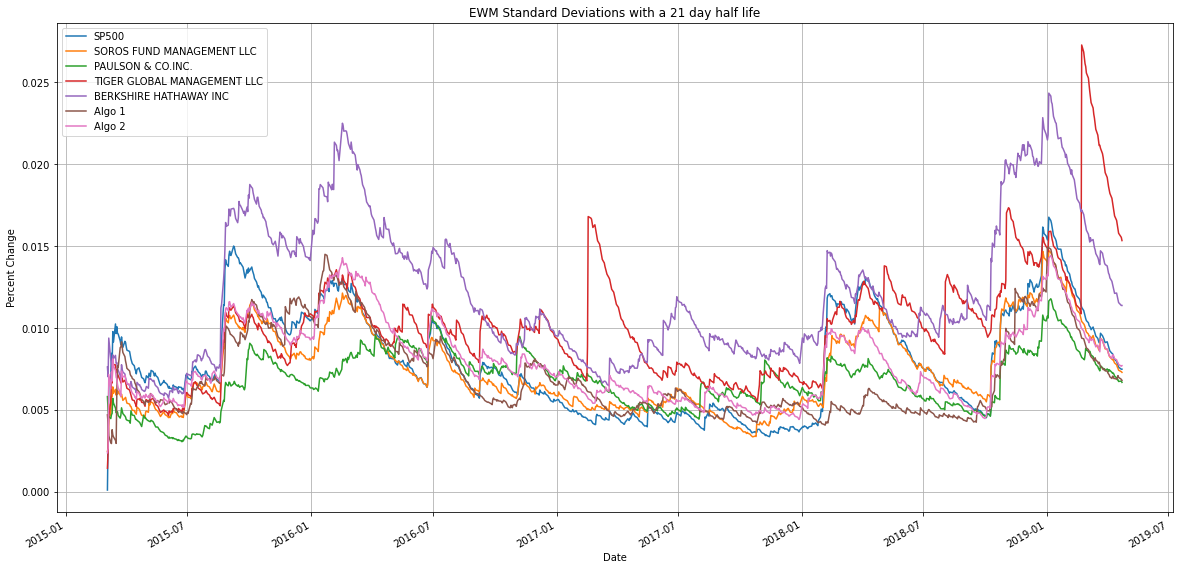

In [54]:
ewm_std= combined_return_df.ewm(halflife = 21).std() # Calculate the EWM w/a 21 day halflife
ewm_std.plot(kind = 'line',figsize = (20,10), grid = True)
graph('EWM Standard Deviations with a 21 day half life','Date','Percent Change')
ewm_std

[Risk Free Rate as of 1/14/21](https://ycharts.com/indicators/10_year_treasury_rate)

In [43]:
risk_free = .011
sharpe_ratios = ((combined_return_df.mean() *252)-risk_free) / (combined_return_df.std() * np.sqrt(252)) # Annualized sharpe ratios

(Text(0.5, 1.0, 'Sharpe Ratio by Portfolio'),
 Text(0.5, 0, 'Portfolio'),
 Text(0, 0.5, 'Sharpe Ratio'))

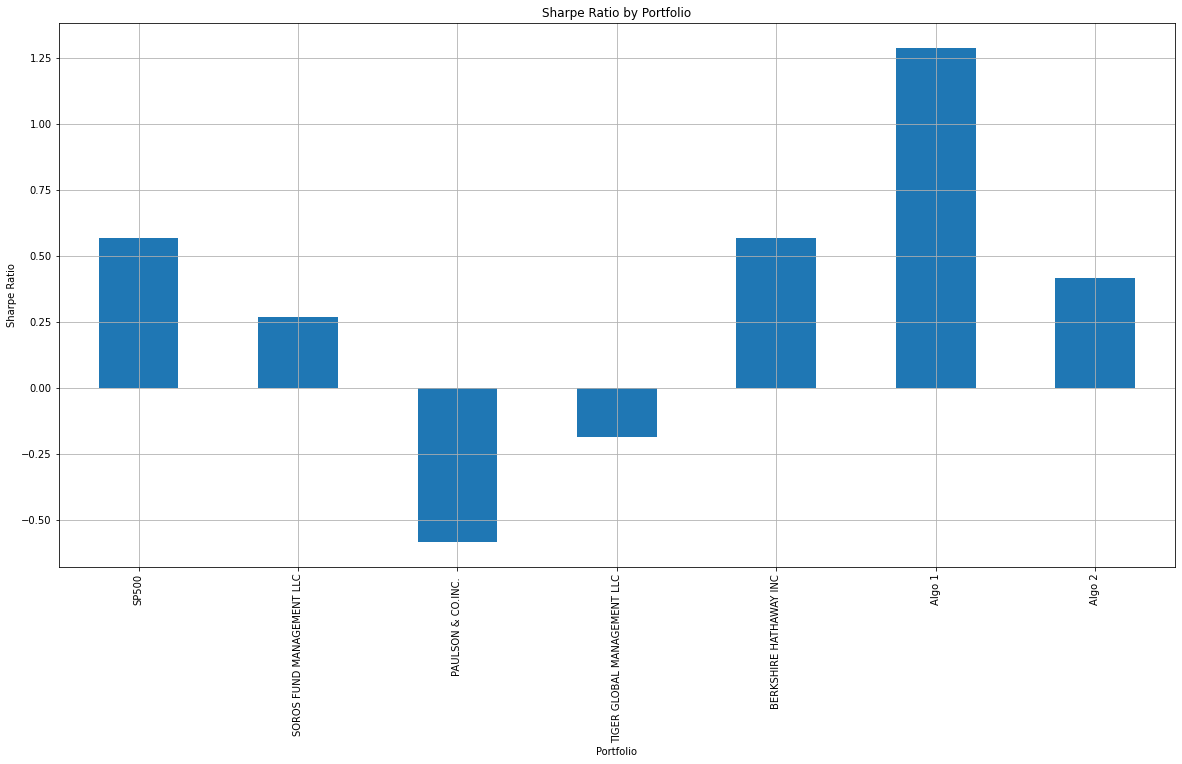

In [44]:
sharpe_ratios.plot(kind = 'bar', figsize = (20,10), grid = True) # Plotting sharpe ratios with a bar chart
graph('Sharpe Ratio by Portfolio','Portfolio','Sharpe Ratio')

In [45]:
print(f'\n\n SHARPE RATIOS: \n\n {sharpe_ratios}')



 SHARPE RATIOS: 

 SP500                          0.567258
SOROS FUND MANAGEMENT LLC      0.268652
PAULSON & CO.INC.             -0.582235
TIGER GLOBAL MANAGEMENT LLC   -0.184667
BERKSHIRE HATHAWAY INC         0.568172
Algo 1                         1.287715
Algo 2                         0.418301
dtype: float64


In [46]:
better_than_SP500 = round(sharpe_ratios[sharpe_ratios > 0.6483],4) # Determine if the algorithmic stategies outperformed,
#... the sp500 and the whale portfolios version 1
print(f'\n\n The following portfolios had a betters Sharpe ratio than the SP500 \n\n {better_than_SP500}')



 The following portfolios had a betters Sharpe ratio than the SP500 

 Algo 1    1.2877
dtype: float64


In [47]:
worse_than_SP500 = round(sharpe_ratios[sharpe_ratios < 0.648267],4) ## Determine if the algorithmic stategies outperformed,
#... the sp500 and the whale portfolios version 1

print(f'\n\n The following portfolios had worse Sharpe ratio than the SP500 \n\n {worse_than_SP500}')



 The following portfolios had worse Sharpe ratio than the SP500 

 SP500                          0.5673
SOROS FUND MANAGEMENT LLC      0.2687
PAULSON & CO.INC.             -0.5822
TIGER GLOBAL MANAGEMENT LLC   -0.1847
BERKSHIRE HATHAWAY INC         0.5682
Algo 2                         0.4183
dtype: float64


In [48]:
# Determine if the algorithmic stategies outperformed the sp500 and the whale portfolios version 2.



In [49]:
# Bin for compound returns
annualized_returns = combined_return_df.mean() * 252 *100
annualized_returns
bins = [-6,3,5,12,20,25]
bin_names = ['Very Low','Low','Moderate','High','Very High']
annualized_returns
annualized_returns = pd.DataFrame(annualized_returns.round(4))
annualized_returns.columns = ['Annual Returns']
annualized_returns['Return Rating'] = pd.cut(annualized_returns['Annual Returns'], bins, labels = bin_names)

In [50]:
annualized_std = pd.DataFrame(combined_annualized_std * 100)
annualized_std.columns = ['Annualized STD']

bins = [0,13,16,20,25]
bin_names = ['Low','Moderate','High','Very High']
annualized_std_rating = pd.cut(combined_annualized_std *100,bins, labels = bin_names)
annualized_std['Risk Rating'] = annualized_std_rating

In [51]:
sharpe = pd.DataFrame(sharpe_ratios)
sharpe.columns = ['Sharpe']

# Creating and implementing bins
bins = [-0.5,0.0,1,1.5,2,3]
bin_names = ['Very Low','Low','Moderate','High','Very High']
sharpe_ratings = pd.cut(sharpe['Sharpe'],bins, labels = bin_names)
sharpe['Sharpe Rating'] = sharpe_ratings

In [52]:
betas = pd.DataFrame(all_single_point_betas)
betas.columns = ['Beta']

bins = [0,0.5,0.7,1.1,1.5]
bin_names = ['Very Low','Low','Moderate','Moderate High']
beta_ratings = pd.cut(betas['Beta'],bins, labels = bin_names)
betas['Beta Rating'] = beta_ratings
betas

,Beta,Beta Rating
SOROS FUND MANAGEMENT LLC,0.773375,Moderate
PAULSON & CO.INC.,0.549886,Low
TIGER GLOBAL MANAGEMENT LLC,0.794653,Moderate
BERKSHIRE HATHAWAY INC,1.134789,Moderate High
Algo 1,0.248991,Very Low
Algo 2,0.837535,Moderate


In [53]:
portfolio_ratings = pd.concat([annualized_returns,annualized_std,betas,sharpe], axis = 'columns',join = 'inner')
sorted_portfolio = portfolio_ratings.sort_values(by = 'Sharpe', ascending = False)
sorted_portfolio

,Annual Returns,Return Rating,Annualized STD,Risk Rating,Beta,Beta Rating,Sharpe,Sharpe Rating
Algo 1,16.6771,High,12.096696,Low,0.248991,Very Low,1.287715,Moderate
BERKSHIRE HATHAWAY INC,12.7519,High,20.507671,Very High,1.134789,Moderate High,0.568172,Low
Algo 2,6.6395,Moderate,13.242950,Moderate,0.837535,Moderate,0.418301,Low
SOROS FUND MANAGEMENT LLC,4.4672,Low,12.533514,Low,0.773375,Moderate,0.268652,Low
TIGER GLOBAL MANAGEMENT LLC,-2.0936,Very Low,17.293641,High,0.794653,Moderate,-0.184667,Very Low


#### Conclusion:
---
The sorted_portfolio above is sorted by the Sharpe ratio in decending order. The [Sharpe ratio](https://www.investopedia.com/terms/s/sharperatio.asp) essentially describes a portfolios bang for the buck or risk adjusted return. The portfolio with the most bang for the buck by far was Algo 1. Algo 1's Sharpe ratio was an impressive 1.28, which was more than doubled the nearest contender; Berkshire. In the markets these portfolios performed in, there is no question as to the Algo 1's dominance. 

As for the second algorithm, algo 2, it did not outperform the sp500 or Berkshire's fund. However, in terms of the other whale funds, it did do better than them.
## Returns
---
In terms of annualized returns, Algo 1 again had the highest amongst them all at 16.68%, not so closely followed by Berkshire which sported a 12.75% Return. 

Here, algo 2 can clearly be seen lacking. It didn't even make the returns the rest of the market made. 
## Risk/STD
---
The most risky portfolio was Berkshire's. Not too far behind was Tiger's. Note how algo 1 is 5th in line on that list. 
As the Sharpe ratio already shows, that is pretty impressive relative to the returns it was able to bring in.

Algo 2 had the 3rd riskiest portfolio. Considering the extremely modest returns it had, this is not a good sign.
## Beta
---
Interestingly enough, algo 1 had the lowest beta. This means that it's returns were [least correlated to market returns](https://www.investopedia.com/terms/b/beta.asp) and viewed the least risky asset to add to your own portfolio.

The portfolio with the highest beta was Berkshire. This is not necessarily a bad thing though. If it had a much higher return and the investor's portfolio was already well diversified, then the investor might choose to take on the marginal risk associated with it. However, since the returns were low in relation to algo 1, if the investor could, they should choose to add algo 1 to their portfolio instead.